# **Modelling**

### Entrenamiento de modelos de Machine Learning

### **Selección de los Modelos**

1. Decision Tree.
   
2. Random Forest.
   
3. Gradient Boost.
   
4. Logistic Regression.
   
5. Ensemble.

6. SVM.

## **Random Forest**

El modelo Random Forest agrupa lo que se denomina árboles de decisión. Esto nos servirá para manejar un gran número de datos, y también es bastante versátil tanto para hacer una clasificación o una regresión. Responde bien al overfitting, sin la necesidad de ajustarse mucho al entrenamiento.
Cuando varios árboles de decisión forman un conjunto en el algoritmo de bosque aleatorio, predicen resultados más precisos, especialmente cuando los árboles individuales no están correlacionados entre sí.

#### LIBRERÍAS NECESARIAS

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

#### EXTRACCIÓN & CARGA DE DATOS

In [70]:
data_train = pd.read_csv('../data/PROCESADO/data_train.csv', sep=',')

In [71]:
data_train

,PassengerId,CryoSleep,Age,VIP,Transported,Add_Services,No_Services,Cabin_Side,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,0,39.0,0,False,0.0,1,0,0,1,0,0,0,1
1,0002_01,0,24.0,0,True,736.0,0,1,1,0,0,0,0,1
2,0003_01,0,58.0,1,False,10383.0,0,1,0,1,0,0,0,1
3,0003_02,0,33.0,0,False,5176.0,0,1,0,1,0,0,0,1
4,0004_01,0,16.0,0,True,1091.0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,False,8536.0,0,0,0,1,0,1,0,0
8689,9278_01,1,18.0,0,False,0.0,1,1,1,0,0,0,1,0
8690,9279_01,0,26.0,0,True,1873.0,0,1,1,0,0,0,0,1
8691,9280_01,0,32.0,0,False,4637.0,0,1,0,1,0,1,0,0


### **Preparación del Entrenamiento**

In [72]:
X = data_train.drop("Transported", axis = 1)
y = data_train["Transported"]

#### Separamos los datos en dos conjuntos, uno para el entrenamiento (train), y otro para la validación (test). 70% para el entrenamiento(train), y el 30% de los datos para la validación(test)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

print(f'FORMA DEL TRAIN = X_train:{X_train.shape}, y_train:{y_train.shape}')
print(f'FORMA DEL TEST = X_test:{X_test.shape}, y_test:{y_test.shape}')

FORMA DEL TRAIN = X_train:(6085, 13), y_train:(6085,)
FORMA DEL TEST = X_test:(2608, 13), y_test:(2608,)


### Estandarización

In [74]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)

X_test_sc = sc.transform(X_test)

### Modelo

In [95]:
rf = RandomForestClassifier(max_features = None, n_estimators= 100, random_state=45)

In [96]:
modelo = rf.fit(X_train_sc, y_train)

modelo.predict(X_test_sc)

array([ True, False,  True, ...,  True, False,  True])

In [97]:
print("RANDOM FOREST:")

print("Entrenamiento: {}".format(rf.score(X_train_sc, y_train) * 100))

print("Validación: {}".format(rf.score(X_test_sc, y_test)* 100,))

RANDOM FOREST:
Entrenamiento: 100.0
Validación: 71.8558282208589


### Matriz de Confusión 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


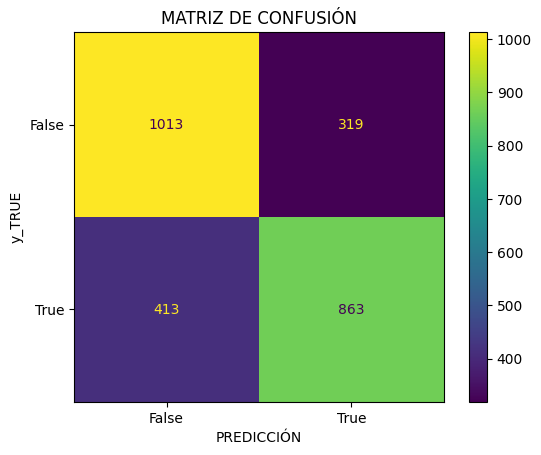

In [90]:
plot_confusion_matrix(rf, X_test_sc, y_test)
plt.xlabel("PREDICCIÓN")
plt.ylabel("y_TRUE")
plt.title("MATRIZ DE CONFUSIÓN")
plt.show();

#### Ajuste de parámetros

In [112]:
rf2 = RandomForestClassifier(max_features = None, max_depth = 45, min_samples_split = 3, min_samples_leaf = 30, random_state=45)
param = {'n_estimators':[100]}

gridcv = GridSearchCV(rf2,param_grid = param, cv=5)

gridcv.fit(X_train_sc ,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=45, max_features=None,
                                              min_samples_leaf=30,
                                              min_samples_split=3,
                                              random_state=45),
             param_grid={'n_estimators': [100]})

In [113]:
y_hat = gridcv.predict(X_test_sc)
y_hat_train = gridcv.predict(X_train_sc)

In [114]:
print('RANDOM FOREST')

print('Precisión del train:' ,accuracy_score(y_train,y_hat_train) * 100, '%')

print('Precisión del test:' ,accuracy_score(y_test,y_hat) * 100, '%')

RANDOM FOREST
Precisión del train: 76.2202136400986 %
Precisión del test: 74.80828220858896 %


### Matriz de Confusión 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


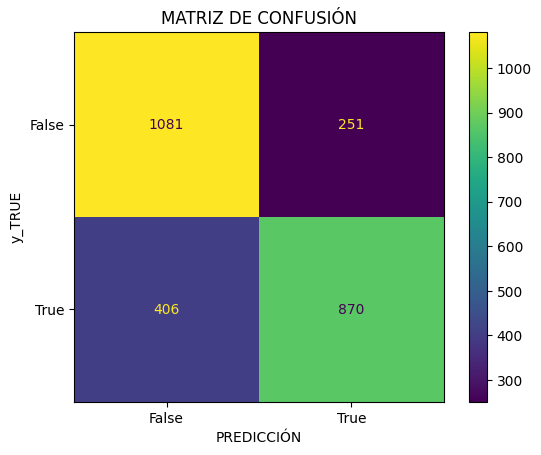

In [106]:
plot_confusion_matrix(rf2, X_test_sc, y_test)
plt.xlabel("PREDICCIÓN")
plt.ylabel("y_TRUE")
plt.title("MATRIZ DE CONFUSIÓN")
plt.show();

### **VALIDACIÓN/TEST**

#### CARGA DE DATOS

In [107]:
data_test = pd.read_csv('../data/PROCESADO/data_test.csv', sep=',')

### **PREDICCIÓN**

In [108]:
predic = pd.DataFrame(rf2.predict(data_test))

predic['PassengerId'] = data_test['PassengerId']

predic = predic.rename(columns = {0:'Transported'})

predic = predic[['PassengerId','Transported']]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [109]:
predic

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [110]:
predic.isnull().sum()

PassengerId    0
Transported    0
dtype: int64

### GUARDAMOS EN UN CSV LA PREDICCIÓN(Submission)

In [111]:
predic.to_csv('../data/SUBMISSIONS/Sub_RanForest.csv', index=False)